Aggregates objects district wise

In [11]:
import pandas as pd
import numpy as np
import random as rnd


def aggregate_district(data,attribute):
    subset = data[[attribute,'district_code']]  
    district_wise = subset.groupby('district_code').mean() #taking mean of ages for each district

    
    ax = district_wise.plot(kind='line',figsize=(15,3)) #plotting line graph to show district wise probability distribution
    ax.set_xticks(range(0,len(district_wise.index)))
    ax.set_xticklabels(district_wise.index.tolist(),rotation = 'vertical') #setting xtick labels
    ax.set_title('District wise distribution (variance = %.4f)' % (district_wise.var())) #setting title for the graph
    return data





Aggregates objects State wise

In [12]:
def aggregate_state(data,attribute):
    subset = data[[attribute,'state_code']]  
    state_wise = subset.groupby('state_code').mean() #taking mean of ages for each district

    
    ax = state_wise.plot(kind='line',figsize=(15,3)) #plotting line graph to show district wise probability distribution
    ax.set_xticks(range(0,len(state_wise.index)))
    ax.set_xticklabels(state_wise.index.tolist(),rotation = 'vertical') #setting xtick labels
    ax.set_title('District wise distribution (variance = %.4f)' % (state_wise.var())) #setting title for the graph
    return data


Samples data of size 20000

In [13]:
def sampling(data_frame):
    total_rows = data_frame.shape[0]
    
    sample_size = 20000

    ls = [] 
    districts = data_frame['district_code'].unique() #returns list of unique districts

    sampled_df = pd.DataFrame(ls,columns=data_frame.columns) #empty data frame with column headings

    for district in districts:
        temp = data_frame.loc[data_frame['district_code']==district] #returns all rows of a certain district
        # print(temp.shape[0])
        rows = temp.sample(n=round((temp.shape[0]/total_rows)*sample_size)) #getting rows for sample
        df = pd.DataFrame(rows,columns=data_frame.columns) #making a data frame after sampling
        df.reset_index(drop=True,inplace=True)
        sampled_df = sampled_df.append(df) #sampled data frame

    sampled_df.reset_index(drop=True,inplace=True)
    return sampled_df


Feature creation

In [14]:

def feature_creation(data_frame):
    data_frame['BMI']=data_frame['Weight_in_kg']/((data_frame['Length_height_cm']/100)*(data_frame['Length_height_cm']/100))
    return data_frame


Feature subset selection. Removes attributes that are highly correlated

In [15]:
def feature_subset(data_frame):
    corr_matrix = data_frame.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    print(upper)
    # Find features with correlation greater than threshold
    threshold=0.9
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    #drop features that have correlation > threshold
    data_frame.drop(to_drop, axis=1, inplace=True)
    
    return data_frame, to_drop

In [16]:
data_frame = pd.read_csv('./../Data/cleanedData/cleanedmergedOdisha.csv',encoding='utf-8')
sampled_df=sampling(data_frame)
sampled_df



c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,state_code,district_code,rural_urban,stratum,PSU_ID,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,Haemoglobin_level,BP_systolic,BP_systolic_2_reading,BP_Diastolic,BP_Diastolic_2reading,Pulse_rate,Pulse_rate_2_reading,Diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl
0,ODISHA,CUTTACK,Urban,Urban,2022567,23,1,05/02/2014,30,More than or equal to 15 PPM,...,12.100000,125.0000,127.000000,74.000000,71.00000,65.000000,69.000000,YES,Measured,90.000000
1,ODISHA,CUTTACK,Rural,200<population<2000,2022989,102,1,11/03/2014,30,More than or equal to 15 PPM,...,12.100000,102.0000,105.000000,67.000000,69.00000,78.000000,75.000000,YES,Measured,96.000000
2,ODISHA,CUTTACK,Rural,population>=2000,2026022,244,1,22/03/2014,30,More than or equal to 15 PPM,...,11.900000,105.0000,108.000000,81.000000,78.00000,80.000000,82.000000,YES,Measured,97.000000
3,ODISHA,CUTTACK,Rural,population>=2000,2023920,222,1,05/01/2014,30,More than or equal to 15 PPM,...,13.300000,120.3729,119.481794,75.460636,75.24977,78.861251,78.494901,YES,Measured,96.119763
4,ODISHA,CUTTACK,Rural,200<population<2000,2024999,33,1,03/04/2014,30,More than or equal to 15 PPM,...,10.552586,120.3729,119.481794,75.460636,75.24977,78.861251,78.494901,YES,Measured,96.119763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,ODISHA,SONAPUR,Rural,200<population<2000,2072470,184,1,04/02/2014,30,More than or equal to 15 PPM,...,11.200000,99.0000,100.000000,72.000000,73.00000,65.000000,70.000000,YES,Measured,92.000000
19995,ODISHA,SONAPUR,Rural,200<population<2000,2069486,44,6,16/02/2014,30,More than or equal to 15 PPM,...,12.100000,144.0000,140.000000,107.000000,103.00000,73.000000,72.000000,YES,Measured,80.000000
19996,ODISHA,SONAPUR,Urban,Urban,2069160,166,1,11/06/2014,30,More than or equal to 15 PPM,...,10.200000,105.0000,110.000000,73.000000,72.00000,98.000000,94.000000,YES,Measured,107.000000
19997,ODISHA,SONAPUR,Rural,200<population<2000,2071451,240,2,08/07/2014,7,Less than 15 PPM,...,10.500000,120.3729,119.481794,75.460636,75.24977,78.861251,78.494901,YES,Measured,96.119763


In [17]:
feature_creation_df=feature_creation(sampled_df)
feature_creation_df


,state_code,district_code,rural_urban,stratum,PSU_ID,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,BP_systolic,BP_systolic_2_reading,BP_Diastolic,BP_Diastolic_2reading,Pulse_rate,Pulse_rate_2_reading,Diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl,BMI
0,ODISHA,CUTTACK,Urban,Urban,2022567,23,1,05/02/2014,30,More than or equal to 15 PPM,...,125.0000,127.000000,74.000000,71.00000,65.000000,69.000000,YES,Measured,90.000000,22.384554
1,ODISHA,CUTTACK,Rural,200<population<2000,2022989,102,1,11/03/2014,30,More than or equal to 15 PPM,...,102.0000,105.000000,67.000000,69.00000,78.000000,75.000000,YES,Measured,96.000000,17.416192
2,ODISHA,CUTTACK,Rural,population>=2000,2026022,244,1,22/03/2014,30,More than or equal to 15 PPM,...,105.0000,108.000000,81.000000,78.00000,80.000000,82.000000,YES,Measured,97.000000,21.142721
3,ODISHA,CUTTACK,Rural,population>=2000,2023920,222,1,05/01/2014,30,More than or equal to 15 PPM,...,120.3729,119.481794,75.460636,75.24977,78.861251,78.494901,YES,Measured,96.119763,13.374409
4,ODISHA,CUTTACK,Rural,200<population<2000,2024999,33,1,03/04/2014,30,More than or equal to 15 PPM,...,120.3729,119.481794,75.460636,75.24977,78.861251,78.494901,YES,Measured,96.119763,20.149574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,ODISHA,SONAPUR,Rural,200<population<2000,2072470,184,1,04/02/2014,30,More than or equal to 15 PPM,...,99.0000,100.000000,72.000000,73.00000,65.000000,70.000000,YES,Measured,92.000000,16.592932
19995,ODISHA,SONAPUR,Rural,200<population<2000,2069486,44,6,16/02/2014,30,More than or equal to 15 PPM,...,144.0000,140.000000,107.000000,103.00000,73.000000,72.000000,YES,Measured,80.000000,23.067505
19996,ODISHA,SONAPUR,Urban,Urban,2069160,166,1,11/06/2014,30,More than or equal to 15 PPM,...,105.0000,110.000000,73.000000,72.00000,98.000000,94.000000,YES,Measured,107.000000,19.528270
19997,ODISHA,SONAPUR,Rural,200<population<2000,2071451,240,2,08/07/2014,7,Less than 15 PPM,...,120.3729,119.481794,75.460636,75.24977,78.861251,78.494901,YES,Measured,96.119763,13.353442


In [18]:
feature_subset_df, dropped = feature_subset(feature_creation_df)
feature_subset_df


                             Age  date_of_birth  month_of_birth  \
Age                          NaN       0.310205        0.269604   
date_of_birth                NaN            NaN        0.375523   
month_of_birth               NaN            NaN             NaN   
year_of_birth                NaN            NaN             NaN   
Weight_in_kg                 NaN            NaN             NaN   
Length_height_cm             NaN            NaN             NaN   
Haemoglobin_level            NaN            NaN             NaN   
BP_systolic                  NaN            NaN             NaN   
BP_systolic_2_reading        NaN            NaN             NaN   
BP_Diastolic                 NaN            NaN             NaN   
BP_Diastolic_2reading        NaN            NaN             NaN   
Pulse_rate                   NaN            NaN             NaN   
Pulse_rate_2_reading         NaN            NaN             NaN   
fasting_blood_glucose_mg_dl  NaN            NaN             Na

,state_code,district_code,rural_urban,stratum,PSU_ID,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,Haemoglobin_test,Haemoglobin,Haemoglobin_level,BP_systolic,BP_Diastolic,Pulse_rate,Diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl,BMI
0,ODISHA,CUTTACK,Urban,Urban,2022567,23,1,05/02/2014,30,More than or equal to 15 PPM,...,YES,Measured,12.100000,125.0000,74.000000,65.000000,YES,Measured,90.000000,22.384554
1,ODISHA,CUTTACK,Rural,200<population<2000,2022989,102,1,11/03/2014,30,More than or equal to 15 PPM,...,YES,Measured,12.100000,102.0000,67.000000,78.000000,YES,Measured,96.000000,17.416192
2,ODISHA,CUTTACK,Rural,population>=2000,2026022,244,1,22/03/2014,30,More than or equal to 15 PPM,...,YES,Measured,11.900000,105.0000,81.000000,80.000000,YES,Measured,97.000000,21.142721
3,ODISHA,CUTTACK,Rural,population>=2000,2023920,222,1,05/01/2014,30,More than or equal to 15 PPM,...,YES,Measured,13.300000,120.3729,75.460636,78.861251,YES,Measured,96.119763,13.374409
4,ODISHA,CUTTACK,Rural,200<population<2000,2024999,33,1,03/04/2014,30,More than or equal to 15 PPM,...,YES,Measured,10.552586,120.3729,75.460636,78.861251,YES,Measured,96.119763,20.149574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,ODISHA,SONAPUR,Rural,200<population<2000,2072470,184,1,04/02/2014,30,More than or equal to 15 PPM,...,YES,Measured,11.200000,99.0000,72.000000,65.000000,YES,Measured,92.000000,16.592932
19995,ODISHA,SONAPUR,Rural,200<population<2000,2069486,44,6,16/02/2014,30,More than or equal to 15 PPM,...,YES,Measured,12.100000,144.0000,107.000000,73.000000,YES,Measured,80.000000,23.067505
19996,ODISHA,SONAPUR,Urban,Urban,2069160,166,1,11/06/2014,30,More than or equal to 15 PPM,...,YES,Measured,10.200000,105.0000,73.000000,98.000000,YES,Measured,107.000000,19.528270
19997,ODISHA,SONAPUR,Rural,200<population<2000,2071451,240,2,08/07/2014,7,Less than 15 PPM,...,YES,Measured,10.500000,120.3729,75.460636,78.861251,YES,Measured,96.119763,13.353442


In [19]:
dropped

['year_of_birth',
 'BP_systolic_2_reading',
 'BP_Diastolic_2reading',
 'Pulse_rate_2_reading']

Plots graphs of the distance between k nearest neighbor and the point in ascending order to predict radius (epsilon) 

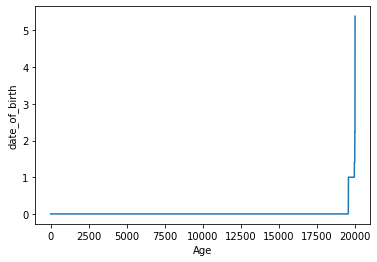

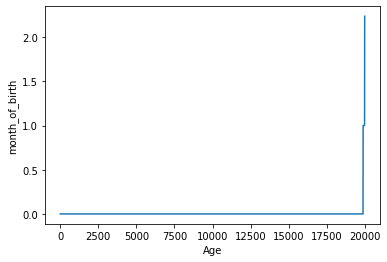

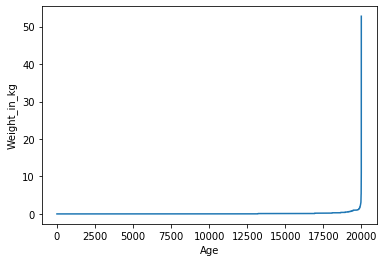

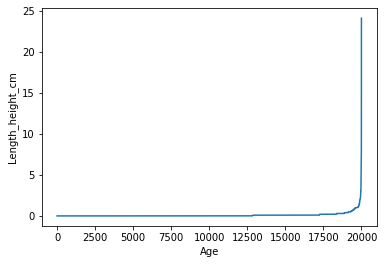

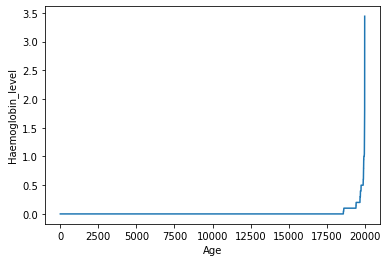

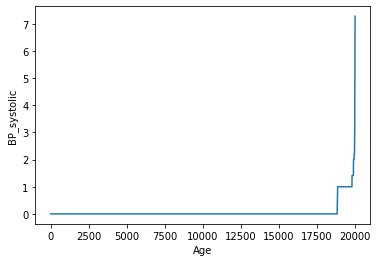

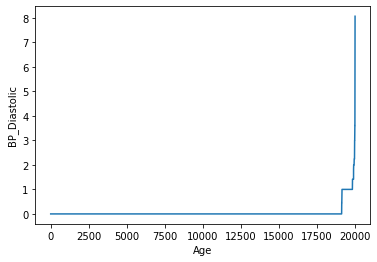

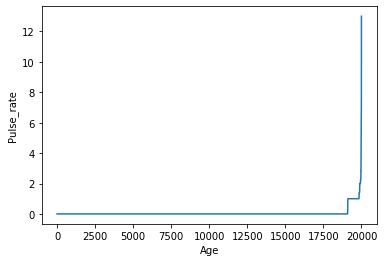

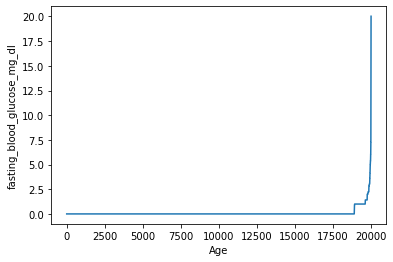

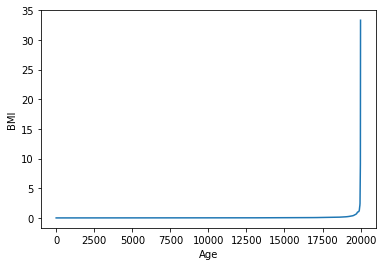

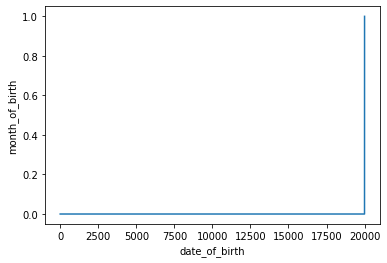

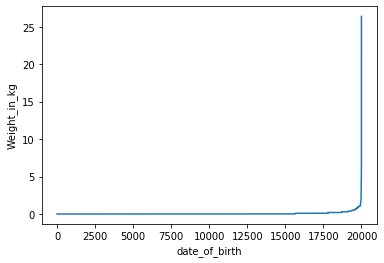

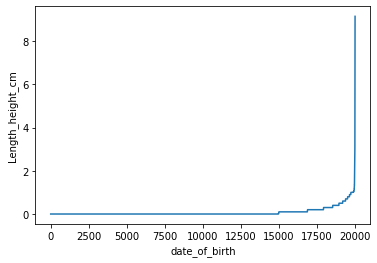

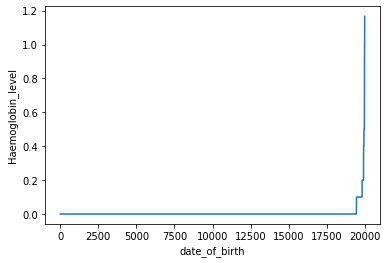

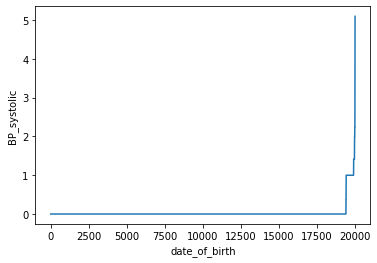

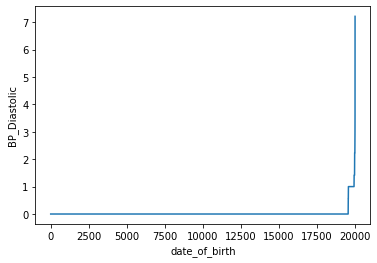

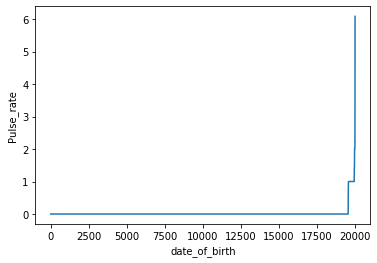

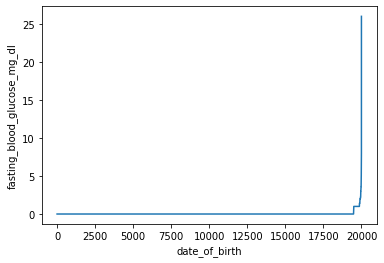

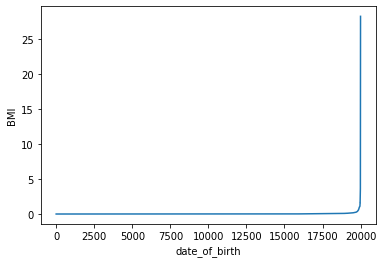

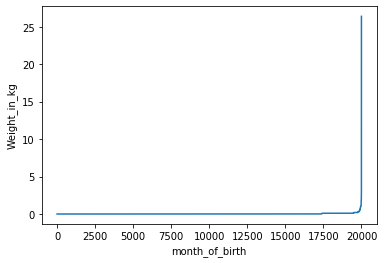

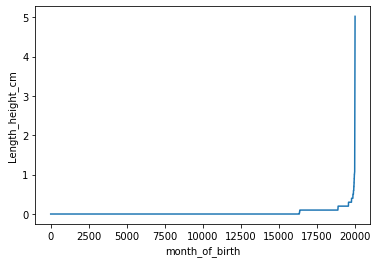

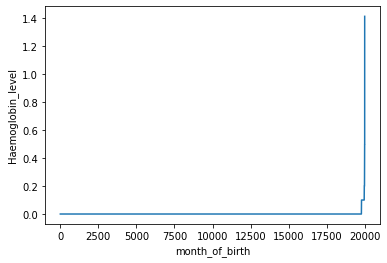

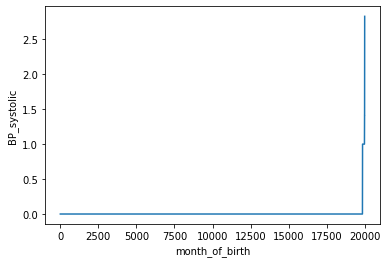

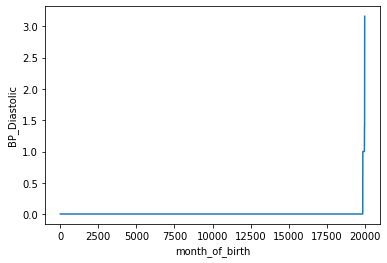

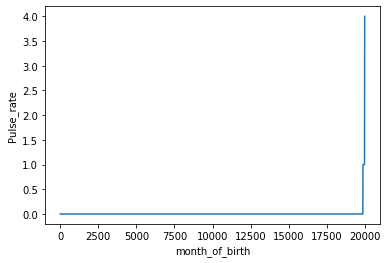

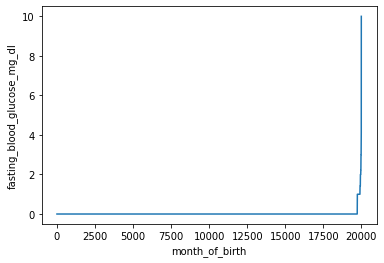

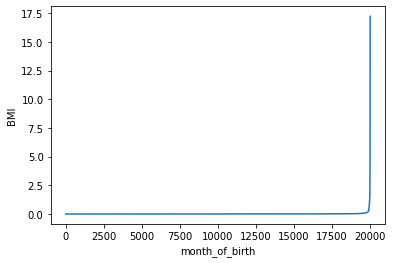

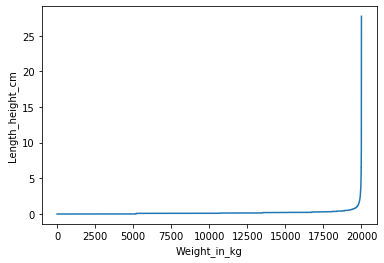

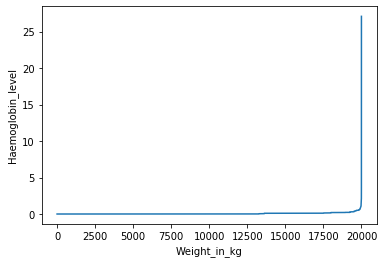

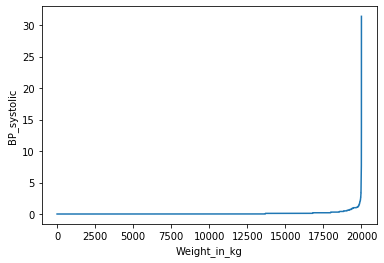

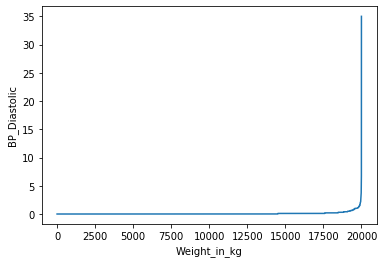

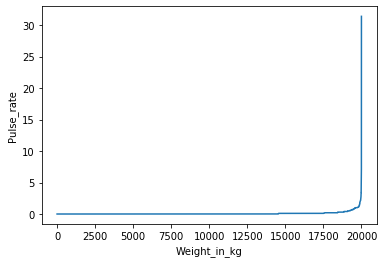

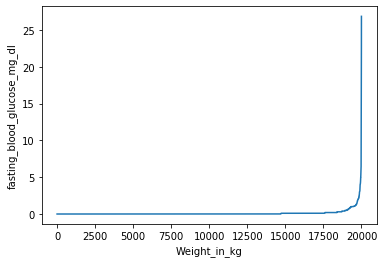

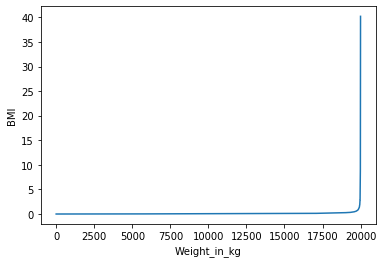

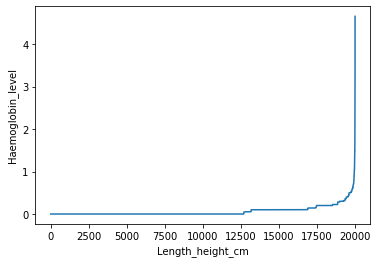

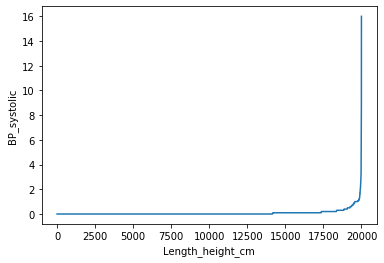

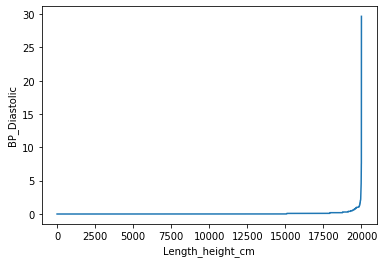

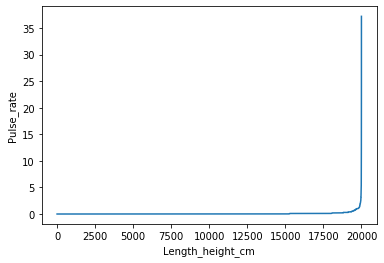

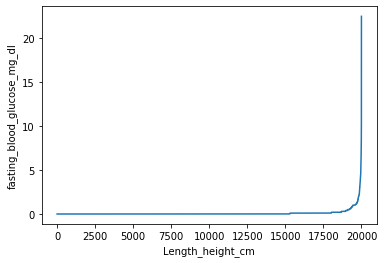

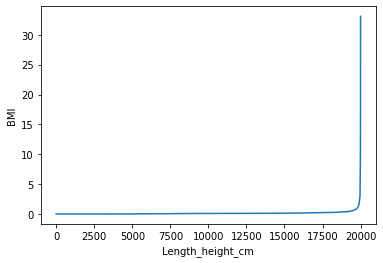

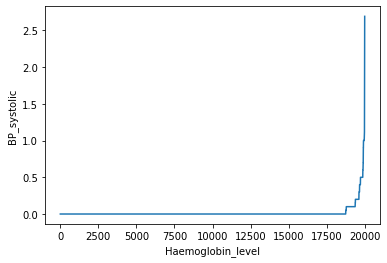

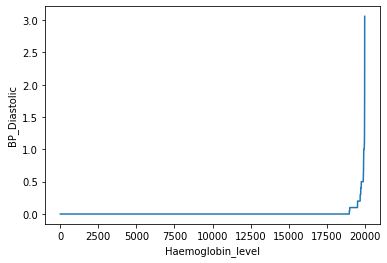

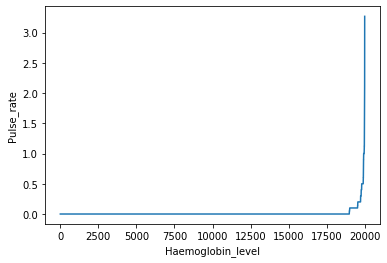

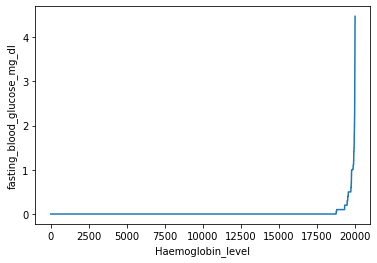

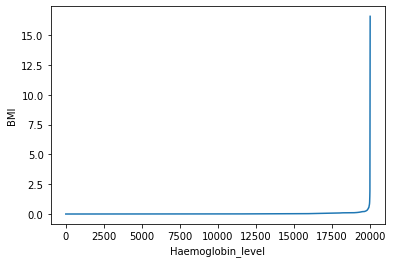

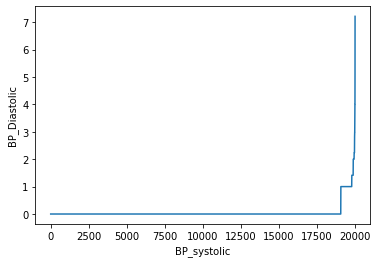

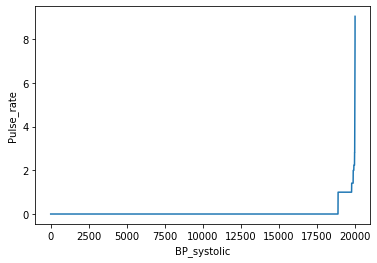

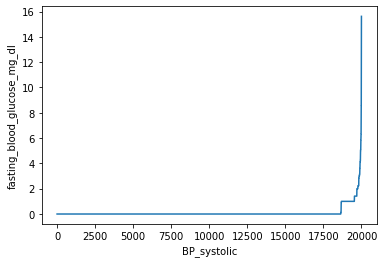

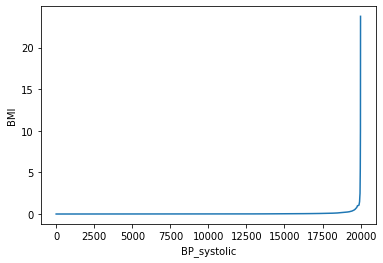

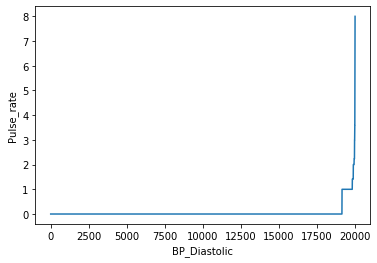

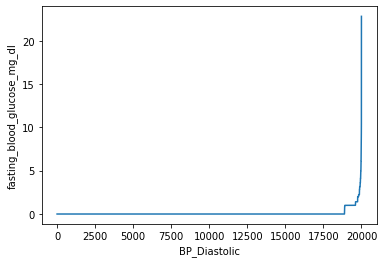

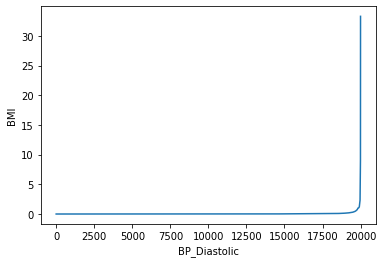

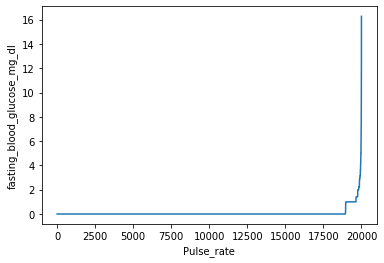

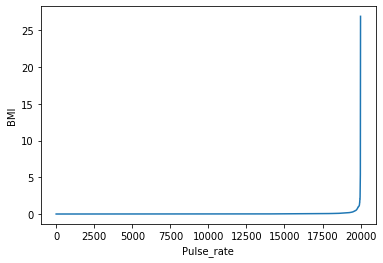

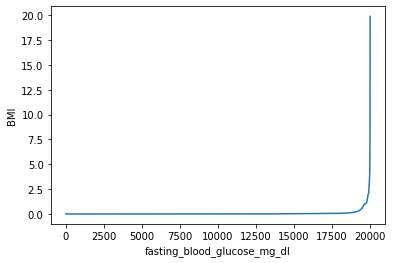

In [20]:
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

attribute_set= ['Age','date_of_birth','month_of_birth','Weight_in_kg','Length_height_cm','Haemoglobin_level','BP_systolic','BP_Diastolic','Pulse_rate','fasting_blood_glucose_mg_dl','BMI']
for i in range(0,len(attribute_set)):
    for j in range(i+1,len(attribute_set)):
        D=feature_subset_df[[attribute_set[i],attribute_set[j]]].values#taking set of two attributes
        neigh = NearestNeighbors(n_neighbors=10)
        nbrs = neigh.fit(D)
        distances, indices = nbrs.kneighbors(D)#finds distance of kth nearest neighbor

        distances = np.sort(distances, axis=0)#sorting the distances in ascending order
        distances = distances[:,1]
        plt.plot(distances)#plots k-distance graph
        plt.xlabel(attribute_set[i])
        plt.ylabel(attribute_set[j])
        path = './../Plots/EPS Plots/Odisha/'+attribute_set[i]+' vs '+attribute_set[j]+'.png' #path to save the plots
        plt.savefig(path,dpi = 300, bbox_inches='tight')
        plt.show()
        


DBSCAN algorithm

In [21]:


def DBSCAN(Data_points, eps, MinPts):    
    cluster_label = [0]*len(D) #Initially all are in cluster 0, then they are clustered starting from cluster number 1

    # C is the ID of the current cluster. Initially all are labelled to be zero   
    cluster_no = 0
    
    for Point in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (cluster_label[Point] == 0):
           continue
        
        # Find all neighboring points.
        NeighborPts = find_neighbors(Data_points, Point, eps)
        
        # If the number is below MinPts, this point is noise. 
        if len(NeighborPts) < MinPts:
            cluster_label[Point] = -1 #Cluster label = -1 means noise point
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
           cluster_no += 1
           growCluster(Data_points, cluster_label, Point, NeighborPts, cluster_no, eps, MinPts)
    
    return cluster_label


def growCluster(Data_points, cluster_label, Point, NeighborPts, cluster_no, eps, MinPts):

    cluster_label[Point] = cluster_no
    
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        next_point = NeighborPts[i]
       
        if cluster_label[next_point] == -1: #if point was considered as a noise earlier, add it to current cluster
           cluster_label[next_point] = cluster_no
        
        # Otherwise, if next_point isn't already claimed, claim it as part of current cluster.
        elif cluster_label[next_point] == 0:
            cluster_label[next_point] = cluster_no
            
            # Find all the neighbors of Pn
            next_point_NeighborPts = find_neighbors(Data_points, next_point, eps)
            
            # If next_point has at least MinPts neighbors, it's a core point
            # Add all of its neighbors to the queue to be searched. 
            if len(next_point_NeighborPts ) >= MinPts:
                NeighborPts = NeighborPts + next_point_NeighborPts 
        
        i += 1        
    
    


def find_neighbors(Data_points, Point, eps):
    
    neighbors = []
    
    for next_point in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if np.linalg.norm(Data_points[Point] - Data_points[next_point]) < eps:
           neighbors.append(next_point)
            
    return neighbors


Driver function that calls DBSCAN

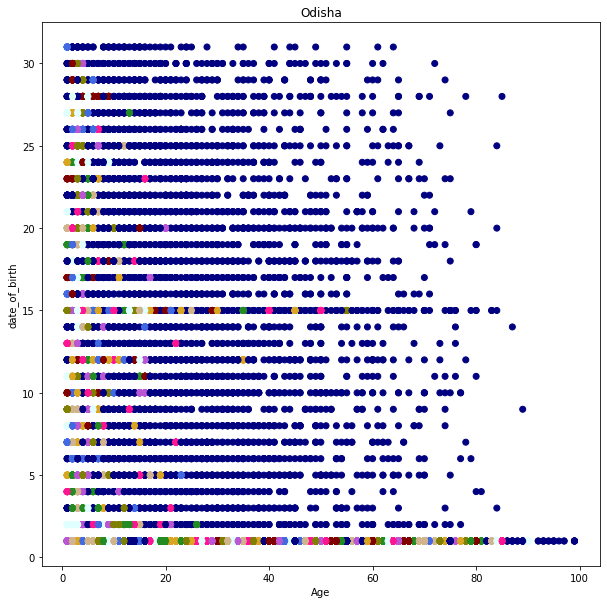

KeyboardInterrupt: 

In [22]:
from matplotlib import pyplot as plt
rows, cols = (11, 11)
eps = [[0]*cols]*rows 
eps[0][1]=1  #these values are found from the "knee" in the curve
eps[0][2]=1
eps[0][3]=1
eps[0][4]=0.5
eps[0][5]=0.2
eps[0][6]=1
eps[0][7]=1
eps[0][8]=1
eps[0][9]=1
eps[0][10]=0.8
eps[1][2]=0.1
eps[1][3]=0.45
eps[1][4]=0.45
eps[1][5]=0.1
eps[1][6]=1
eps[1][7]=1
eps[1][8]=1
eps[1][9]=1
eps[1][10]=0.5
eps[2][3]=0.3
eps[2][4]=0.3
eps[2][5]=0.1
eps[2][6]=1
eps[2][7]=1
eps[2][8]=1
eps[2][9]=1
eps[2][10]=0.5
eps[3][4]=0.8
eps[3][5]=0.35
eps[3][6]=0.5
eps[3][7]=0.46
eps[3][8]=0.2
eps[3][9]=0.6
eps[3][10]=0.56
eps[4][5]=0.28
eps[4][6]=0.75
eps[4][7]=0.23
eps[4][8]=0.4
eps[4][9]=0.7
eps[4][10]=0.67
eps[5][6]=0.17
eps[5][7]=0.13
eps[5][8]=0.1
eps[5][9]=0.35
eps[5][10]=0.17
eps[6][7]=1
eps[6][8]=1
eps[6][9]=1
eps[6][10]=1
eps[7][8]=1
eps[7][9]=1
eps[7][10]=0.45
eps[8][9]=1
eps[8][10]=0.56
eps[9][10]=0.6

attribute_set= ['Age','date_of_birth','month_of_birth','Weight_in_kg','Length_height_cm','Haemoglobin_level','BP_systolic','BP_Diastolic','Pulse_rate','fasting_blood_glucose_mg_dl','BMI']

for i in range(0,len(attribute_set)):
    for j in range(i+1,len(attribute_set)):
        D=feature_subset_df[[attribute_set[i],attribute_set[j]]].values #taking combination of two attribues once
        clusters= DBSCAN(D, eps[i][j], 10) #returns labels for each point, forming clusters

        colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
        vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

        plt.figure(figsize =(10, 10))
        plt.scatter(D[:,0], D[:,1], c=vectorizer(clusters)) #assigns colours to the clusters
        plt.title('Odisha')
        plt.xlabel(attribute_set[i])
        plt.ylabel(attribute_set[j])
        path = './../Plots/DBSCAN plots/Odisha/'+attribute_set[i]+' vs '+attribute_set[j]+'.png' #path to save the plots
        plt.savefig(path,dpi = 300, bbox_inches='tight')
        plt.show()

